# How are the technological hubs of manufacturing evolving in the world? An analysis on the rate of innovation. 
<h2 align="center"> Part 2: The Analysis</h2>

-----

### Description of Section: Statistics, Predictions and Visualisations

The goal of this project is to answer the following questions:

#### What industries have a high innovation rate, and how is the market in that field?

I will look into the fields of industry with the highest innovation/ patent number filing, and I will carry out a market analysis in this field, looking into which companies are the strongest and invest the most in R&D in given field. I will try answering the following questions: 
    - Are more companies appearing?
    - How much funding do they get?
    - What is the drop rate of companies appearing in the field?



### This section will be structured as follows:
    
#### BONUS:
- Q2.1: A market analysis: what field/industry has the biggest R&D investment/ highest growth in patents?
- Q2.2: In that field, what companies do we have, how much do they invest into R&D compared to their profits?


- Q3: Taking a start-up database, what is the drop rate of companies in that field (if last funding longer than 5 years ago = inactive)?

In [242]:
# importing basic libraries needed: 

# for database manipulation
import pandas as pd
import numpy as np
import os
import datetime as dt

# for visualisations:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly_express as px
import plotly.graph_objs as go
from plotly import tools

# for statistics
from scipy import stats
from sklearn import preprocessing

# libraries for machine learning will be imported throught the process to clarify what tools are being used at each step

###  Q2.1: A market analysis: what field/industry has the highest growth in patents/ biggest R&D investment ?

#### 2.1.1. Biggest growth in patents

To analyse the biggest growth in patents I will be using the patents by industry database form __________. 

First I will quickly look at a cross-market overview, then I will analyse the biggest growth industy in the last 5 years, and plot the top 3 to see their development. 

In [105]:
# look at patents per industry and country over time
# another panel data
df = pd.read_csv("../00_data/00_clean_datasets/Q1/patents_by_industry.csv", index_col=0)
df.drop("country name", axis=1, inplace=True)

In [106]:
df["industry"].value_counts().count()

36

In [107]:
# set index to see wolrdwide patterns in market
df = df.groupby("industry").sum()

In [108]:
# transpose to plot better
dft = df.transpose()
dft.drop("Unknown", axis=1, inplace=True)

In [109]:
dft.tail()

industry,"1 - Electrical machinery, apparatus, energy",10 - Measurement,11 - Analysis of biological materials,12 - Control,13 - Medical technology,14 - Organic fine chemistry,15 - Biotechnology,16 - Pharmaceuticals,"17 - Macromolecular chemistry, polymers",18 - Food chemistry,...,32 - Transport,"33 - Furniture, games",34 - Other consumer goods,35 - Civil engineering,4 - Digital communication,5 - Basic communication processes,6 - Computer technology,7 - IT methods for management,8 - Semiconductors,9 - Optics
2013,76556.0,55119.0,6738.0,19185.0,51320.0,34144.0,23446.0,39758.0,22151.0,21275.0,...,48789.0,28638.0,18986.0,38983.0,50775.0,11688.0,89445.0,11560.0,48254.0,42565.0
2014,80822.0,57144.0,7124.0,19748.0,54680.0,35678.0,23941.0,41625.0,22696.0,20929.0,...,49157.0,30920.0,18955.0,40706.0,57851.0,11196.0,93383.0,11746.0,50804.0,42424.0
2015,81517.0,59846.0,8097.0,19745.0,56284.0,35430.0,24302.0,38689.0,21396.0,18433.0,...,51269.0,29128.0,19534.0,45442.0,61487.0,10417.0,89028.0,9555.0,46827.0,37515.0
2016,98838.0,68096.0,8507.0,24185.0,64254.0,38520.0,26419.0,42289.0,25603.0,21250.0,...,63372.0,34145.0,23885.0,54998.0,68641.0,11214.0,103731.0,12560.0,52811.0,41029.0
2017,105840.0,75574.0,8746.0,27248.0,66492.0,35821.0,25873.0,40405.0,24230.0,14999.0,...,66003.0,33516.0,23769.0,56712.0,71633.0,11268.0,112064.0,14502.0,51590.0,40524.0


##### quick overview

Text(0, 0.5, 'number of patents')

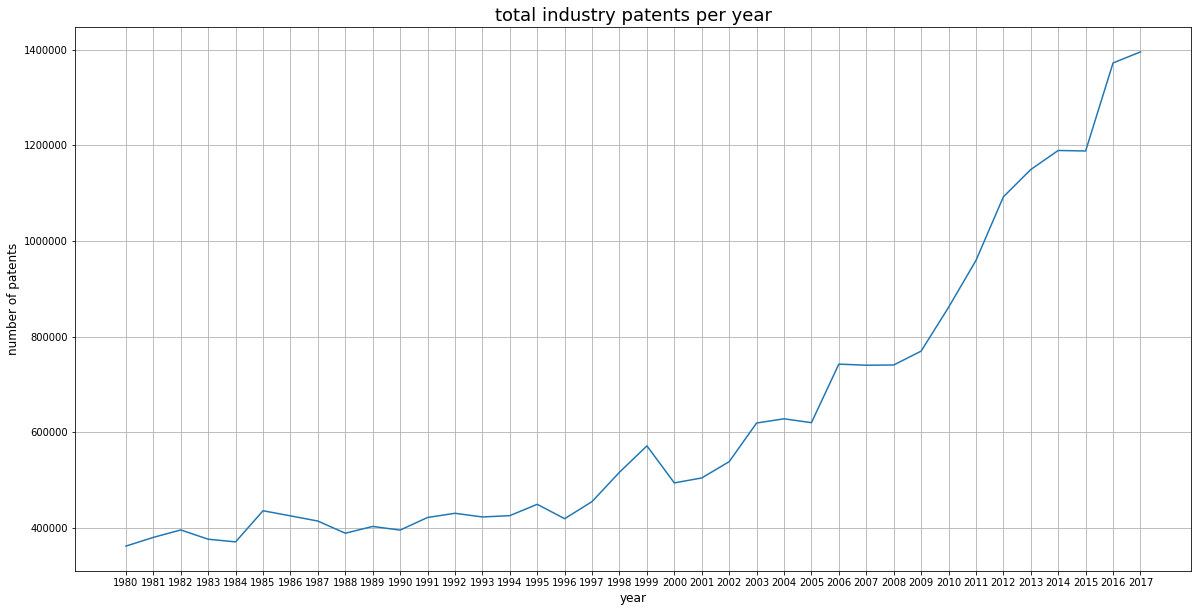

In [70]:
# numeber of total industry patents over time
# sublot definition
f, ax = plt.subplots(figsize=(20, 10))

# plot function
plt.plot(dft.sum(axis=1))

# style changes
plt.grid(axis="both")

# labeling
plt.title("total industry patents per year", fontsize=18)
plt.xlabel("year", fontsize=12)
plt.ylabel("number of patents", fontsize=12)

##### calculate max growth in last 5 years (biggest differnce btw 2017 and 2012)

> pct_change() is not working therefore I will do it with a simple substraction of rows


In [152]:
# select row 2017 and subtract row for 2012
# the sort values and turn to DF
growth = pd.DataFrame(dft.iloc[37]-dft.iloc[37-5]).sort_values(by=0, ascending=False)
# select top 5 industries and make to list for plotting
lst = growth[:5].index.to_list()
print(lst)

['1 - Electrical machinery, apparatus, energy', '6 - Computer technology', '10 - Measurement', '4 - Digital communication', '32 - Transport']


From this quick analysis, we see that the "most innovative market" (that with the biggest increase in patent filing in the last years) is the **Electrical machinery, apparatus, and energy** industry.

This fits in well with my initial hypothesis and with my expertese, as I was hoping to do a market analysis on electical machinery manufacturing as well as the chip production. 

When looking at the graphs below, it is very surprising to see the similarities in the growth patterns. This result is in agreement with the reports of exponential innvoation growth of technologies.

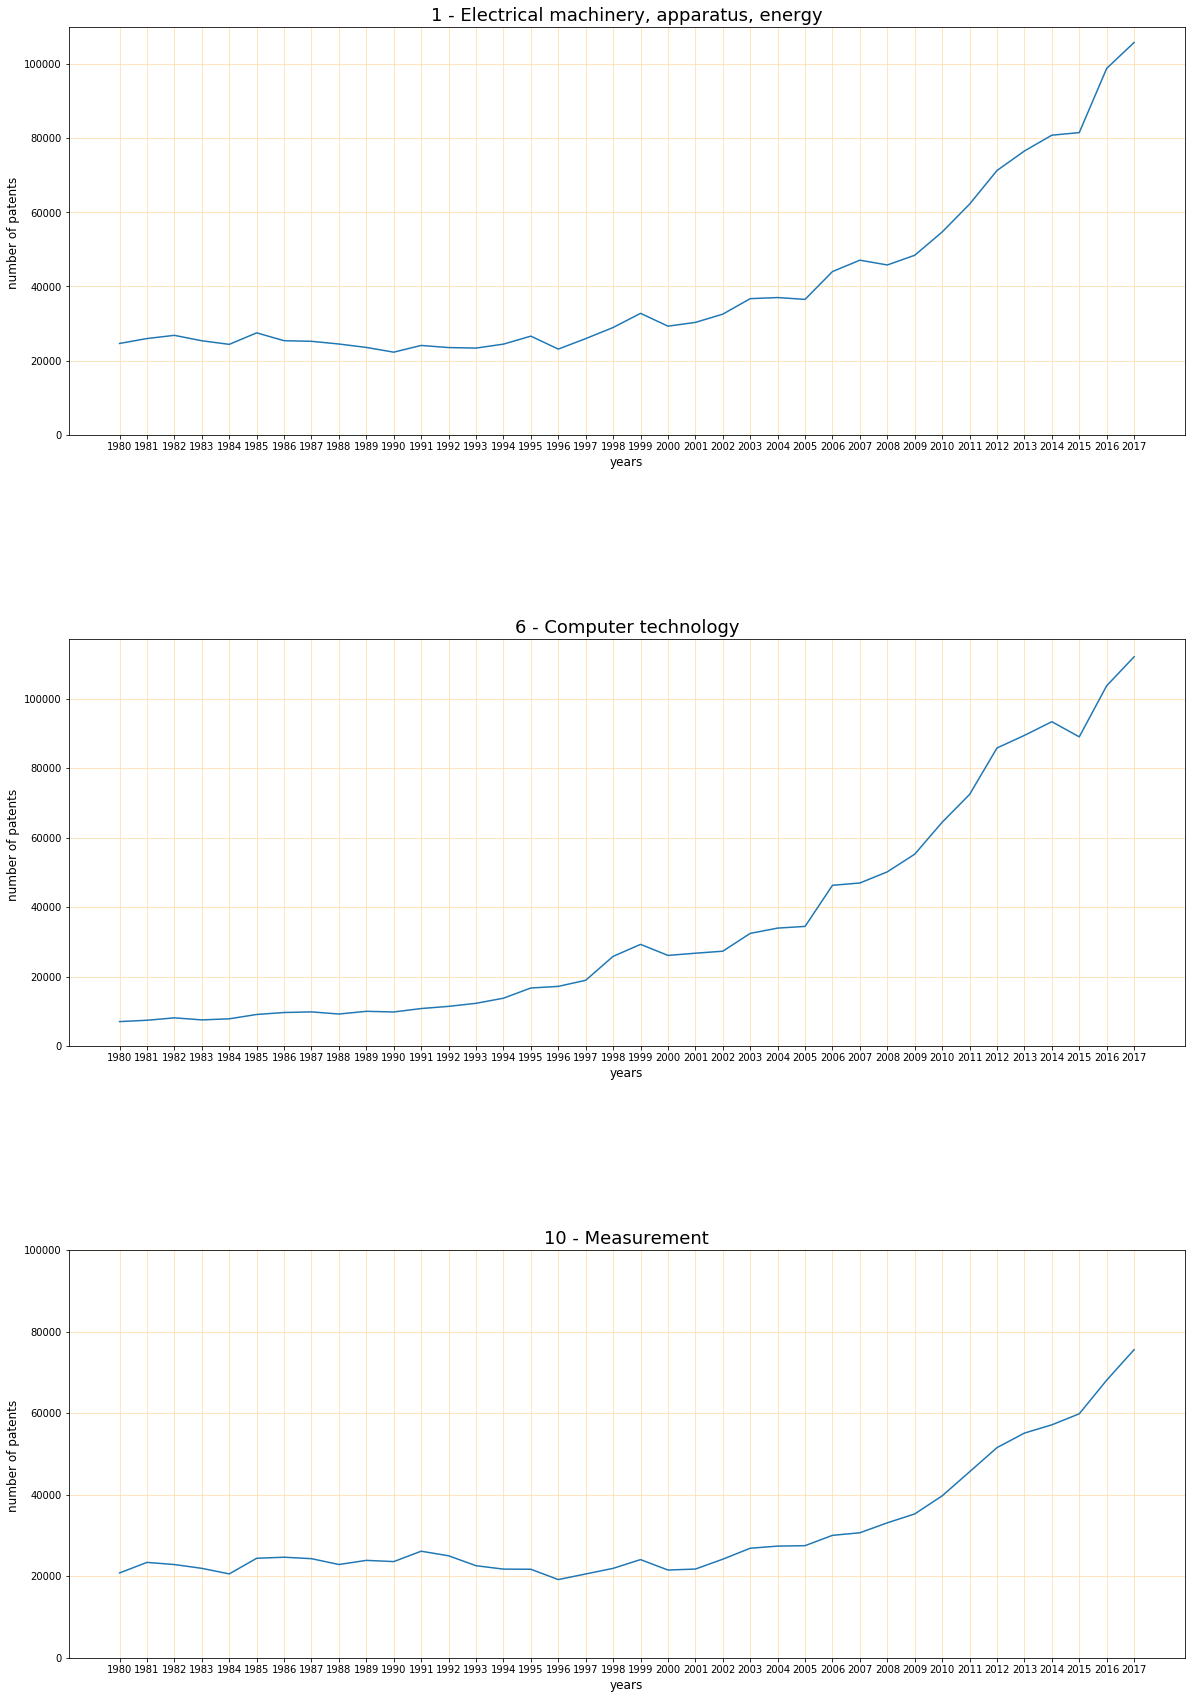

In [150]:
# plotting of top 3 innovative industries

#define subplot
fig, axs = plt.subplots(3, figsize=(20,30))

# for loop for plotting all values in lst

for i in lst[:3]:
    # plot function
    axs[lst.index(i)].plot(dft[[i]])
    
    # label changes
    axs[lst.index(i)].set_title(i, fontsize=18)
    axs[lst.index(i)].set_xlabel("years", fontsize=12)
    axs[lst.index(i)].set_ylabel("number of patents ", fontsize=12)
    
    # style changes
    axs[lst.index(i)].grid(axis="both", color='navajowhite')
    axs[lst.index(i)].set_yticks(np.arange(0, 120000, 20000))
    
    plt.subplots_adjust(hspace=0.5)

#### 2.1.2. Biggest R&D investment

To analyse the biggest growth in patents I will be using the patents by industry database form __________.

For the biggest investements I will be using a table on company information. 


In [183]:
# open data on RnD per company
RnD = pd.read_csv("../00_data/00_clean_datasets/Q2/company_info.csv")

In [184]:
# open data on company information and patent count
patent_lst = pd.read_csv("../00_data/00_clean_datasets/Q1/company_lst.csv")

In [185]:
# merge both tables for full info:
dfm = patent_lst.merge(RnD, how="left", on="Company_id")

In [186]:
dfm.head()

,Company_id,office,company,country code,industry,count,Year,R&D_investemetn,net_sales,operating_profits,employees
0,1,CN,ZUMTOBEL,AUT,Electronic & Electrical Equipment,84,2011,55.071,1280.312,34.591,7456.0
1,1,CN,ZUMTOBEL,AUT,Electronic & Electrical Equipment,84,2012,66.926,1243.616,21.659,7162.0
2,1,CN,ZUMTOBEL,AUT,Electronic & Electrical Equipment,84,2013,71.800,1246.831,12.144,7291.0
3,1,CN,ZUMTOBEL,AUT,Electronic & Electrical Equipment,84,2014,89.739,1312.620,41.091,7234.0
4,1,EP,ZUMTOBEL,AUT,Electronic & Electrical Equipment,263,2011,55.071,1280.312,34.591,7456.0


In [196]:
# group by industry
# sum of investement in RnD from 2011 to 2014
# sum of patents from 2011 to 2014
dfg = dfm.groupby(["industry"]).sum()
dfg.head()

,Company_id,count,Year,R&D_investemetn,net_sales,operating_profits,employees
industry,,,,,,,
Aerospace & Defense,741532,113540,1497300,3.702950e+05,8.009294e+06,6.884792e+05,28205412.0
Alternative Energy,47488,2312,177100,1.022198e+04,2.277818e+05,1.208832e+04,636321.0
Automobiles & Parts,1783420,511728,3984750,1.620446e+06,3.771093e+07,2.163265e+06,111232841.0
Banks,94880,5508,338100,8.257564e+04,4.625367e+06,4.486548e+05,22080985.0
Chemicals,1945864,275864,4194050,3.871192e+05,1.495864e+07,1.464543e+06,28134375.0


In [197]:
# relativise investement through operating profits:
# RnD% of profit
dfg["RnD_relative"] = dfg["R&D_investemetn"]/dfg["operating_profits"]*100

In [198]:
# select only wanted  columns
dfg = dfg[["count", "RnD_relative"]]

In [206]:
# top 5 industries with highest RnD investemetn relative to profit:
dfg.sort_values(by="RnD_relative", ascending=False)[:5].index.to_list()

['Leisure Goods',
 'Alternative Energy',
 'Automobiles & Parts',
 'Pharmaceuticals & Biotechnology',
 'Technology Hardware & Equipment']

In [207]:
# top 5 industries with highest patent count:
dfg.sort_values(by="count", ascending=False)[:5].index.to_list()

['Technology Hardware & Equipment',
 'Electronic & Electrical Equipment',
 'Automobiles & Parts',
 'General Industrials',
 'Chemicals']

We see from this sorting, that overall, the industry where most companies register patent is similar to that analysed in the fastest innovating sector. i.e. ```Electrical machinery, apparatus, and energy``` industry, or as it is called in this dataset: ```Technology Hardware & Equipment```, and ```Electronic & Electrical Equipment```.

It is interesting to see, however that relative to profit, the industies with highest investement in RnD are not the same as those with the highest number of patents. 

I will run a quick R2 test, a correlation, colinearity and a OLS and plot the two variables to see the realtionship between them. 

In [208]:
# correlation:
dfg.corr()

,count,RnD_relative
count,1.00000,0.40155
RnD_relative,0.40155,1.00000


In [220]:
# linear regression - how well does one explain the other ?

# define x and y

x = dfg["RnD_relative"]
y = dfg["count"]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("1. slope = ", slope, "2. intercept = ", intercept, "3. r_value = ", r_value, "4. p_value = ", p_value, "5, std_err = ", std_err)

1. slope =  2672.570319716577 2. intercept =  27205.41499617879 3. r_value =  0.4015497500065152 4. p_value =  0.0152067245315461 5, std_err =  1045.3665713563132


Relative RnD investement **doesn't** seem to be highly related with the number of patents registered in an industry (At least not when looking across all countries in the world and agglomerating all companies). 

However the results do mirror an expected positive trend: the more you invest, the more patents you will have.

>We have obtained a **correlation = 0.4** and a **R*** **=0.4**

_* The closer R is to either the of the two extremes, the better the fit of the data points to the line_


([<matplotlib.axis.YTick at 0x2d04fed0dd8>,
 <a list of 7 Text yticklabel objects>)

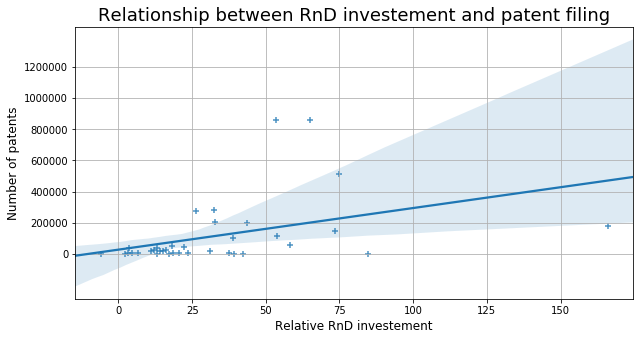

In [239]:
# plot:
f, ax = plt.subplots(figsize=(10, 5))

# plot function
sns.regplot(data = dfg, x="RnD_relative", y="count", marker = "+")

# style changes
plt.grid(axis="both")

# labeling
plt.title("Relationship between RnD investement and patent filing", fontsize=18)
plt.xlabel("Relative RnD investement", fontsize=12)
plt.ylabel("Number of patents", fontsize=12)
plt.yticks(np.arange(0, 1400000, 200000))

#### overall analysis of %

In [248]:
dfg_c = dfm.groupby(["industry"]).count()[["company"]]

In [255]:
# patent count per industry

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

patent_pie = go.Pie(labels=dfg.index, values=dfg["count"], marker=dict(colors=colors
                                                            , line=dict(color='#FFF', width=2)), 
                                                            domain={'x': [0.0, .4], 'y': [0.0, 1]}
                                                            , showlegend=True, textinfo='percent')

company_pie = go.Pie(labels=dfg_c.index, values=dfg_c["company"], marker=dict(colors=colors
                                                            , line=dict(color='#FFF', width=2)), 
                                                            domain={'x': [.6, 1], 'y': [0.0, 1]}
                                                            , showlegend=True,  textinfo='percent')

layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   title = 'Trends in the markets')
go.Figure(data = [patent_pie,company_pie ], layout = layout)


### Q2.2: In that field, what companies do we have, how much do they invest into R&D compared to their profits?
Fields of study: ```Technology Hardware & Equipment``` and ```Electronic & Electrical Equipment```

In [258]:
dfm = dfm[dfm["industry"] == "Electronic & Electrical Equipment"]|[dfm["industry"] == "Technology Hardware & Equipment"]

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().